## 1. Problem definition
The first step in any project is defining the problem. Powerful algorithms can be used
for solving the problem, but the results will be meaningless if the wrong problem is
solved.
The following framework should be used for defining the problem:
1. Describe the problem informally and formally. List assumptions and similar
problems.
2. List the motivation for solving the problem, the benefits a solution provides, and
how the solution will be used.
3. Describe how the problem would be solved using the domain knowledge.

## 2. Loading the data and packages
The second step gives you everything needed to start working on the problem. This
includes loading libraries, packages, and individual functions needed for the model
development.

### Loading necessary library

In [2]:


import numpy as np
import sklearn
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

### Loading Data
The following items should be checked and removed before loading
the data:
• Column headers
• Comments or special characters
• Delimiter

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data['Price'] = boston_dataset.target


In [4]:
print(boston_dataset.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 3. Exploratory data analysis

In this step, we look at the dataset.
### 3.1. Descriptive statistics. 
Understanding the dataset is one of the most important
steps of model development. The steps to understanding data include:
1. Viewing the raw data.
2. Reviewing the dimensions of the dataset.
3. Reviewing the data types of attributes.
4. Summarizing the distribution, descriptive statistics, and relationship among the
variables in the dataset.

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Reviewing the dimensions of the dataset


In [7]:
data.shape

(506, 14)

#### Reviewing the data types of the attributes in the data

In [8]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

#### Summarizing the data using descriptive statistics

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 3.2. Data visualization
The fastest way to learn more about the data is to visualize it.
Visualization involves independently understanding each attribute of the dataset.
Some of the plot types are as follows:
#### Univariate plots
Histograms and density plots
#### Multivariate plots
Correlation matrix plot and scatterplot
The Python code for univariate plot types is illustrated with examples below:

#### Univariate plot: histogram


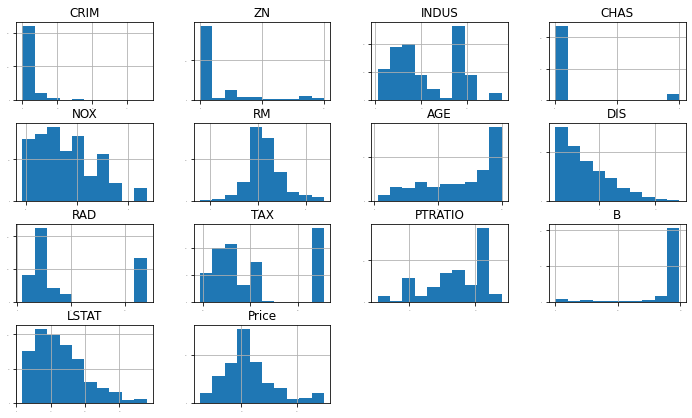

In [10]:
from matplotlib import pyplot
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,\
figsize=(12,7))
plt.show()


#### Univariate plot: density plot

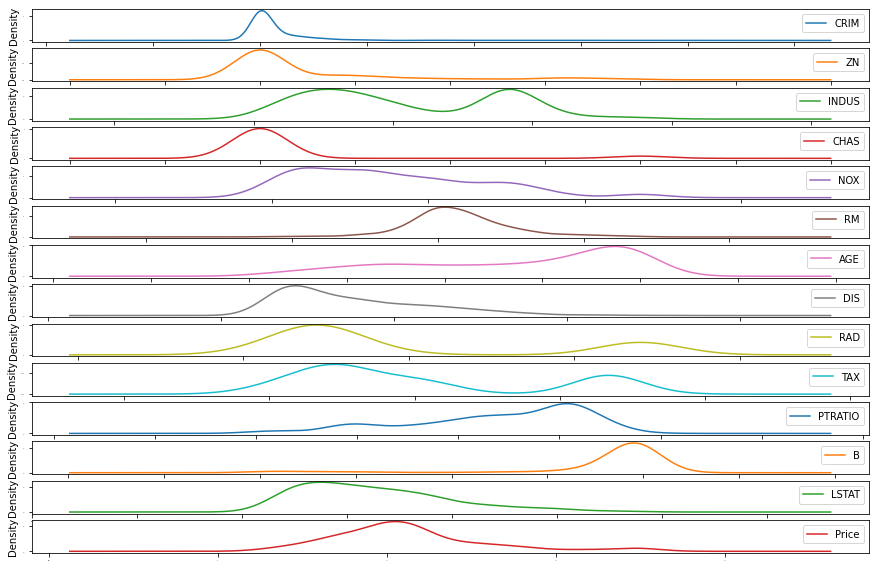

In [11]:
from matplotlib import pyplot
data.plot(kind='density', subplots=True, sharex=False,\
legend=True, fontsize=1, figsize=(15,10))
pyplot.show()

#### Multivariate plot: correlation matrix plot

<AxesSubplot:title={'center':'Correlation Matrix'}>

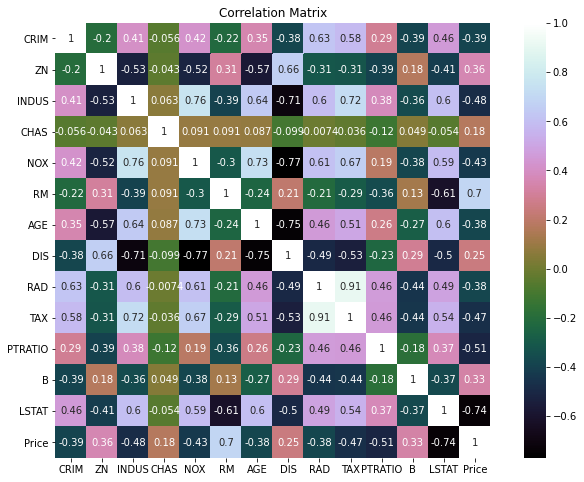

In [12]:
correlation = data.corr()
pyplot.figure(figsize=(12,8))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

#### Multivariate plot: scatterplot matrix

array([[<AxesSubplot:xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot:xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot:xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot:xlabel='B', ylabel='CRIM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot:xlabel='Price', ylabel='CRIM'>],
       [<AxesSubplot:xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='NOX', ylabel='ZN'>,
        <AxesSubplot:xlabel='

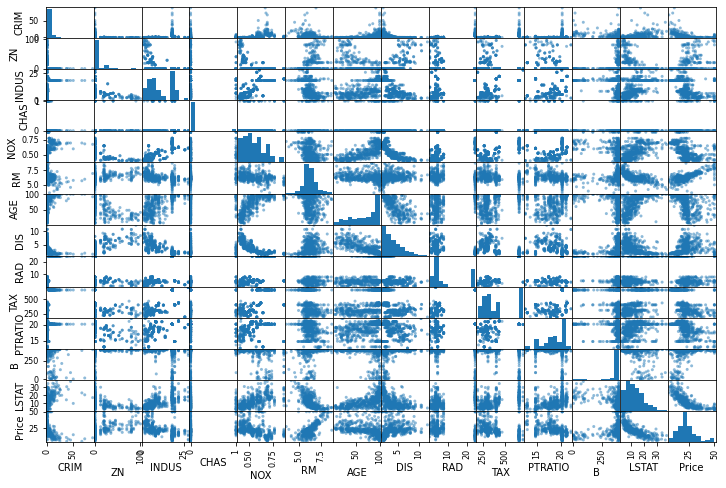

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (12,8))

## 4. Data preparation
Data preparation is a preprocessing step in which data from one or more sources is
cleaned and transformed to improve its quality prior to its use

#### 4.1. Data cleaning. 
In machine learning modeling, incorrect data can be costly. Data
cleaning involves checking the following:
#### Validity
The data type, range, etc.
#### Accuracy
The degree to which the data is close to the true values.
#### Completeness
The degree to which all required data is known.
#### Uniformity
The degree to which the data is specified using the same unit of measure.
The different options for performing data cleaning include:


#### Checking missing values

In [14]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64


#### Dropping “NA” values within data

In [15]:
# data.dropna(axis=0)

#### Filling “NA” with 0

In [16]:
# dataset.fillna(0)


#### Filling NAs with the mean of the column

In [17]:
# data['col'] = data['col'].fillna(dataset['col'].mean())


#### 4.2. Feature selection. 
The data features used to train the machine learning models
have a huge influence on the performance. Irrelevant or partially relevant features
can negatively impact model performance. Feature selection1
 is a process in which
features in data that contribute most to the prediction variable or output are auto‐
matically selected.
The benefits of performing feature selection before modeling the data are:
#### Reduces overfitting2
Less redundant data means fewer opportunities for the model to make decisions
based on noise.
#### Improves performance
Less misleading data means improved modeling performance.
#### Reduces training time and memory footprint
Less data means faster training and lower memory footprint.


 ##### SelectKBest function 
 The selectKBest function scores the features using an underlying function and then removes all but
the k highest scoring feature:


In [19]:
#setting the matrices
X = data.iloc[:,0:13] #Feature Set
Y = data.iloc[:,13].values # Target Values
Y = Y.reshape(data.shape[0],1)




   Features     Score
12    LSTAT  5.752151
0      CRIM  3.413923
5        RM  2.675998
4       NOX  2.338995
6       AGE  2.329545
9       TAX  2.210056
2     INDUS  2.151220
8       RAD  1.914649
11        B  1.818332
10  PTRATIO  1.776251
1        ZN  1.698253
7       DIS  1.506687
3      CHAS  1.102329


c:\python\python391\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Importance')

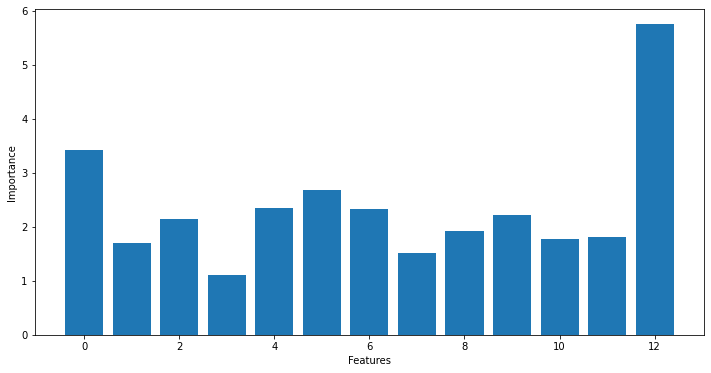

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest( k=5)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["Features","Score"]
print(featureScores.nlargest(13,'Score'))
plt.figure(figsize = (12,6))
plt.bar([x for x in range(len(featureScores["Score"]))], featureScores["Score"])
plt.xlabel("Features")
plt.ylabel("Importance")


#### When features are irrelevant, they should be dropped. 
Dropping the irrelevant features is illustrated in the following sample code:

In [45]:
#dropping the old features

#dataset.drop(['Feature1','Feature2','Feature3'],axis=1,inplace=True)


#### 4.3. Data transformation. 
Many machine learning algorithms make assumptions about
the data. It is a good practice to perform the data preparation in such a way that
exposes the data in the best possible manner to the machine learning algorithms. This
can be accomplished through data transformation.
The different data transformation approaches are as follows:
#### Rescaling
When data comprises attributes with varying scales, many machine learning
algorithms can benefit from rescaling all the attributes to the same scale.
Attributes are often rescaled in the range between zero and one. This is useful for
optimization algorithms used in the core of machine learning algorithms, and it
also helps to speed up the calculations in an algorithm:

In [59]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X))



#### Standardization
Standardization is a useful technique to transform attributes to a standard nor‐
mal distribution with a mean of zero and a standard deviation of one. It is most
suitable for techniques that assume the input variables represent a normal distri‐
bution:

In [47]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
StandardisedX = pd.DataFrame(scaler.fit_transform(X))


'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler().fit(X)\nStandardisedX = pd.DataFrame(scaler.fit_transform(X))\n\n\n'

#### Normalization
Normalization refers to rescaling each observation (row) to have a length of one
(called a unit norm or a vector). This preprocessing method can be useful for
sparse datasets of attributes of varying scales when using algorithms that weight
input values:


In [48]:
'''
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
NormalizedX = pd.DataFrame(scaler.fit_transform(X))


'''

'\nfrom sklearn.preprocessing import Normalizer\nscaler = Normalizer().fit(X)\nNormalizedX = pd.DataFrame(scaler.fit_transform(X))\n\n\n'

## 5. Evaluate models
Once we estimate the performance of our algorithm, we can retrain the final algo‐
rithm on the entire training dataset and get it ready for operational use. The best way
to do this is to evaluate the performance of the algorithm on a new dataset. Different
machine learning techniques require different evaluation metrics. Other than model
performance, several other factors such as simplicity, interpretability, and training
time are considered when selecting a model. 

#### 5.1. Training and test split. 
The simplest method we can use to evaluate the perfor‐
mance of a machine learning algorithm is to use different training and testing data‐
sets. We can take our original dataset and split it into two parts: train the algorithm
on the first part, make predictions on the second part, and evaluate the predictions
against the expected results. The size of the split can depend on the size and specifics
of the dataset, although it is common to use 80% of the data for training and the
remaining 20% for testing. The differences in the training and test datasets can result
in meaningful differences in the estimate of accuracy. The data can easily be split into
the training and test sets using the train_test_split function available in sklearn:

In [62]:
from sklearn.model_selection import train_test_split

# split out validation dataset for the end
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation =\
train_test_split(rescaledX, Y, test_size=validation_size, random_state=seed)


#### 5.2. Identify evaluation metrics. 
Choosing which metric to use to evaluate machine
learning algorithms is very important. An important aspect of evaluation metrics is
the capability to discriminate among model results. Different types of evaluation
metrics used for different kinds of ML models are covered in detail across several
chapters of this book.

#### 5.3. Compare models and algorithms. 
Selecting a machine learning model or algorithm
is both an art and a science. There is no one solution or approach that fits all. There
are several factors over and above the model performance that can impact the decision to choose a machine learning algorithm. 

We have no idea which algorithms will do well on this problem. Let’s design our test
now. We will use two models—one linear regression and the second polynomial
regression to fit Y against X. We will evaluate algorithms using the Root Mean Squared Error (RMSE) metric, which is one of the measures of the model performance. RMSE will give a gross idea of how wrong all predictions are (zero is perfect):

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)
rmse_lin = np.sqrt(mean_squared_error(Y_train,Y_pred))
r2_lin = r2_score(Y_train,Y_pred)
print("RMSE for Linear Regression:", rmse_lin)
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
model = LinearRegression()
model.fit(x_poly, Y_train)
Y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(Y_train,Y_poly_pred))
r2 = r2_score(Y_train,Y_poly_pred)
print("RMSE for Polynomial Regression:", rmse)

RMSE for Linear Regression: 4.431559241550927
RMSE for Polynomial Regression: 2.3820618001048586


We can see that the RMSE of the polynomial regression is slightly better than that of
the linear regression With the former having the better fit, it is the preferred model
in this step.

## 6. Model tuning
Finding the best combination of hyperparameters of a model can be treated as a
search problem. This searching exercise is often known as model tuning and is one of
the most important steps of model development. It is achieved by searching for the
best parameters of the model by using techniques such as a grid search. In a grid
search, you create a grid of all possible hyperparameter combinations and train
the model using each one of them. Besides a grid search, there are several othertechniques for model tuning, including randomized search, Bayesian optimization, and hyperbrand.

In the case studies presented in this book, we focus primarily on grid search for
model tuning.

Continuing on from the preceding example, with the polynomial as the best model:
next, run a grid search for the model, refitting the polynomial regression with differ‐
ent degrees. We compare the RMSE results for all the models:


Text(0.5, 0.98, 'Algorithm Comparison for Training Data')

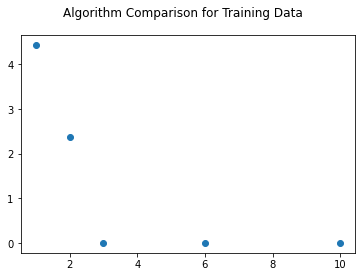

In [64]:
Deg= [1,2,3,6,10]
results=[]
names=[]
for deg in Deg:
    polynomial_features= PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly, Y_train)
    Y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(Y_train,Y_poly_pred))
    r2 = r2_score(Y_train,Y_poly_pred)
    results.append(rmse)
    names.append(deg)
plt.plot(names, results,'o')
plt.suptitle('Algorithm Comparison for Training Data')

The RMSE decreases when the degree increases, and the lowest RMSE is for the
model with degree 10. However, models with degrees lower than 10 performed very
well, and the test set will be used to finalize the best model.


While the generic set of input parameters for each algorithm provides a starting point
for analysis, it may not have the optimal configurations for the particular dataset and
business problem.

## 7. Finalize the model
Here, we perform the final steps for selecting the model. First, we run predictions on
the test dataset with the trained model. Then we try to understand the model intu‐
ition and save it for further usage.

#### 7.1. Performance on the test set.
The model selected during the training steps is further
evaluated on the test set. The test set allows us to compare different models in an
unbiased way, by basing the comparisons in data that were not used in any part of the
training. The test results for the model developed in the previous step are shown in
the following example:

Text(0.5, 0.98, 'Algorithm Comparison for Test Data')

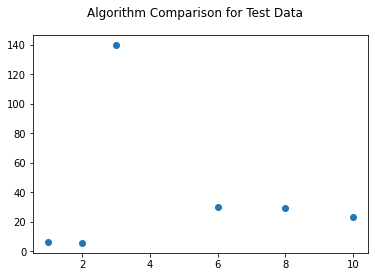

In [65]:
Deg= [1,2,3,6,8,10]
results_test = []
names_test = []

for deg in Deg:
    polynomial_features= PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly, Y_train)
    x_poly_test = polynomial_features.fit_transform(X_validation)
    Y_poly_pred_test = model.predict(x_poly_test)
    rmse = np.sqrt(mean_squared_error(Y_validation,Y_poly_pred_test))
    r2 = r2_score(Y_validation,Y_poly_pred_test)
    results_test.append(rmse)
    names_test.append(deg)
plt.plot(names_test, results_test,'o')
plt.suptitle('Algorithm Comparison for Test Data')


In the training set we saw that the RMSE decreases with an increase in the degree of
polynomial model, and the polynomial of degree 10 had the lowest RMSE. However,
as shown in the preceding output for the polynomial of degree 10, although the train‐
ing set had the best results, the results in the test set are poor. For the polynomial of
degree 8, the RMSE in the test set is relatively higher. The polynomial of degree 2
shows the best result in the test set (although the difference is small compared to
other lower-degree polynomials in the test set) as well as good results in the training
set. For these reasons, this is the preferred model.


# Prediction of Housing Price by using Final Selected Model

In [66]:
polynomial_features_2= PolynomialFeatures(degree=2)
x_poly_final= polynomial_features_2.fit_transform(X_train)
model_f = LinearRegression()
model_f.fit(x_poly_final, Y_train)
x_poly_test_final = polynomial_features_2.fit_transform(X_validation)
Y_poly_pred_test_final = model_f.predict(x_poly_test_final)
rmse = np.sqrt(mean_squared_error(Y_validation,Y_poly_pred_test_final))
r2 = r2_score(Y_validation,Y_poly_pred_test_final)
print("RMSE for Polynomial Regression:", rmse)
print("r2 for Polynomial Regression:", r2)

RMSE for Polynomial Regression: 5.535818902995744
r2 for Polynomial Regression: 0.620755979898447


In [67]:
preds_df_test = pd.DataFrame(zip(Y_validation,Y_poly_pred_test_final), columns = ["Actual", "Predicted"]).astype(float)
preds_df_test.head(10)

,Actual,Predicted
0,21.7,36.357422
1,18.5,20.050781
2,22.2,22.382812
3,20.4,19.462891
4,8.8,4.660156
5,8.3,9.644531
6,21.4,22.539062
7,23.6,26.966797
8,23.5,26.445312
9,19.0,13.671875


<AxesSubplot:>

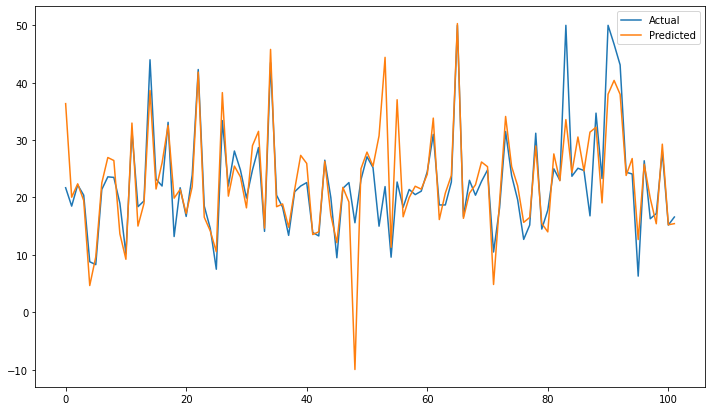

In [68]:
preds_df_test.plot(figsize = (12,7))